# 선형회귀

### 4.1.1 정규방정식
직접적으로 결과를 얻을 수 있는 수학적 공식

$ \widehat{\theta} = (X^T * X)^{-1} * X^T * Y $

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)


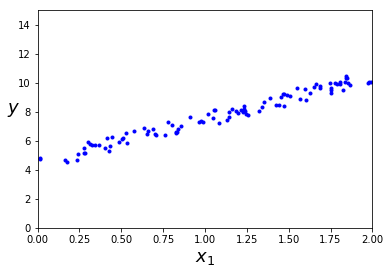

In [38]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [40]:
theta_best

array([[4.53598403],
       [2.95808143]])

In [41]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)        # 왜 X_new_b와 theta_Best를 곱하는가? 
print(y_predict)

[[ 4.53598403]
 [10.45214688]]


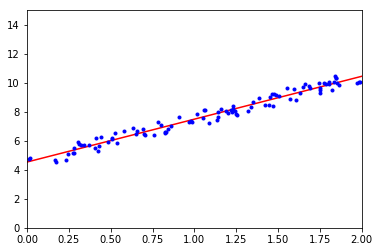

In [42]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)   # intercept 는 편향(bias), coef는 가중치(w)
print(lin_reg.predict(X_new))

[4.53598403] [[2.95808143]]
[[ 4.53598403]
 [10.45214688]]


## 4.1.2 계산 복잡도

하지만 이 정규방정식은 샘플 특성 수가 들어나면 계산 시간이 많이 증가합니다.

훈련 세트의 샘플 수가 증가해도 계산 시간이 많이 증가합니다.

## 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

배치는 전체 훈련세트를 한꺼번에 훈련한다는 의미이다.

경사 하강법을 하기 위해서는 모든 ${\theta}$에 대해서 (모든 가중치에 대해서) 함수의 그래디언트를 계산해야한다.

In [44]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화 -> random initial!

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # X 는 feature x를 모은 벡터이다.
    theta = theta - eta*gradients

In [45]:
print(theta)

[[4.53598403]
 [2.95808143]]


## 4.2.2 확률적 경사 하강법(SGD)

In [46]:
n_epochs = 50
t0, t1, = 5, 50 # 학습 스케줄 하이퍼파라미터
m = 100  # 훈련 세트에 있는 샘플 수

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # 무작위로 샘플 하나씩을 선별합니다.   어차피 샘플 수 만큼 반복 * epoch 반복 하는데 의미가있나?
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i) # 학습률을 조절합니다.
        theta = theta - eta * gradients


In [47]:
print(theta)

[[4.55933127]
 [2.95576564]]


In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1) # 50번 학습합니다.
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.55210462] [2.9768224]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


## 4.2.3 미니배치 경사 하강법

임의의 작은 샘플 세트에 대해 그래디언트를 계산합니다. 

확률적 경사 하강법과 배치 경사 하강법을 약간 섞은 기분입니다.

## 4.3 다항 회귀

In [49]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.90601391]
[-2.90601391  8.44491684]


In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.8453981] [[0.95554563 0.50452703]]


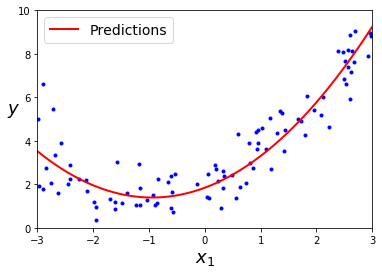

In [52]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습 곡선

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= 0.2)
    train_errors, val_errors = [],[]
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2,label = "훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "검증 세트")
        

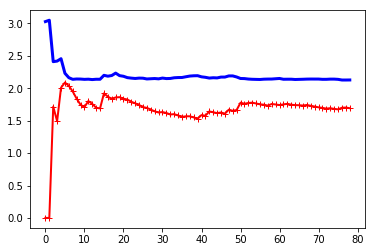

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

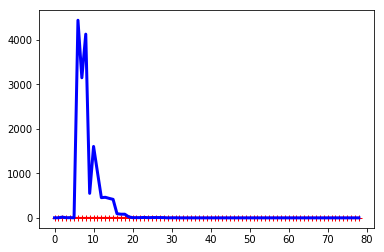

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

## 4.5 규제

### 4.5.1 릿지 회귀

In [56]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93350967]])

In [57]:
sgd_reg = SGDRegressor(max_iter = 5, penalty ="l2")
sgd_reg.fit(X,y.ravel())
print(sgd_reg.predict([[1.5]]))

[4.14860682]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### 4.5.2 라쏘 회귀
그림 4-19 이해를 잘 못하겠음.

In [58]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

[4.89492081]


### 4.5.3 엘라스틱넷
릿지 회귀와 라쏘 회귀를 절충한 모델

In [59]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) # l1 ratio가 0이면 릿지, 1이면 라쏘
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))

[4.89609651]


### 4.5.4 조기 종료

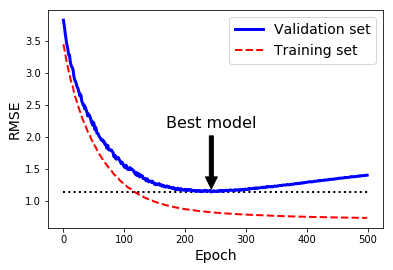

In [65]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter = 1, warm_start = True, penalty = "None", learning_rate = "constant", eta0 = 0.0005)

n_epochs = 500
train_errors, val_errors = [], []

# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None

# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train)
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val, y_val_predict)
    
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = clone(sgd_reg)
        
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()
        

## 4.6 로지스틱 회귀

### 4.6.3 결정 경계(decision boundary)

In [66]:
from sklearn import datasets
iris = datasets.load_iris()

In [67]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [70]:
X = iris["data"][:,3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) # 1 Iris-Virginica면 1, 그렇지 않으면 0


In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

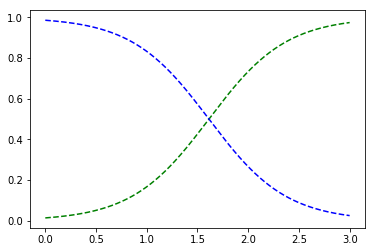

In [72]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Iris-Virginica 아님")

In [73]:
log_reg.predict([[1.7],[1.5]])


array([1, 0])

### 4.6.4 소프트맥스 회귀
(= 다항 로지스틱 회귀)

In [75]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [76]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
softmax_reg.predict([[5,2]])

array([2])

In [78]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])